In [1]:
import numpy as np
import numpy.linalg as alg
import numpy.random as rd
import matplotlib.pyplot as plt

d=10.0

data1 = rd.normal([-d, d], 1.0, (20, 2))
data2 = rd.normal([d, -d], 1.0, (30, 2))
data3 = rd.normal([-d, -d], 1.0, (40, 2))
data4 = rd.normal([d, d], 1.0, (50, 2))


In [2]:
data = np.concatenate((data1, data2, data3, data4))
nb_classes = 4

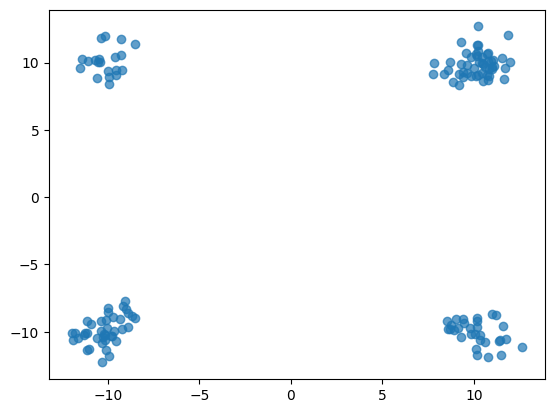

In [3]:
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)


In [4]:
def init_classes(data, nb_classes):
    N = data.shape[0]
    barycentres = [data[rd.randint(N)] for id_classe in range(nb_classes)]
    distances = [alg.norm(data - b, axis=1) for b in barycentres]
    return np.argmin(distances, axis=0)


In [5]:
def update_classes(data, classes, nb_classes):
    barycentres = [
        np.mean(data[classes == id_classe], axis=0) for id_classe in range(nb_classes)
    ]
    distances = [alg.norm(data - b, axis=1) for b in barycentres]
    return np.argmin(distances, axis=0)


In [6]:
def energie(data, classes):
    e = 0
    for id_classe in range(np.unique(classes).shape[0]):
        d = data[classes == id_classe]
        b = np.mean(d, axis=0)
        e += np.sum((d - b) ** 2)
    return e


In [7]:
def k_moyennes(data, nb_classes):
    #N = data.shape[0]
    #classes = rd.randint(nb_classes, size=N)
    classes=init_classes(data, nb_classes)
    while True:
        c = update_classes(data, classes, nb_classes)
        if np.unique(c).shape[0] != nb_classes:
            print("Cluster vide, passage à " + str(nb_classes - 1) + " classes")
            return k_moyennes(data, nb_classes - 1)
        if np.all(c == classes):
            classes = c
            break
        classes = c
    return classes


In [8]:
classes = k_moyennes(data, nb_classes)
print(energie(data, classes))

248.83816326564857


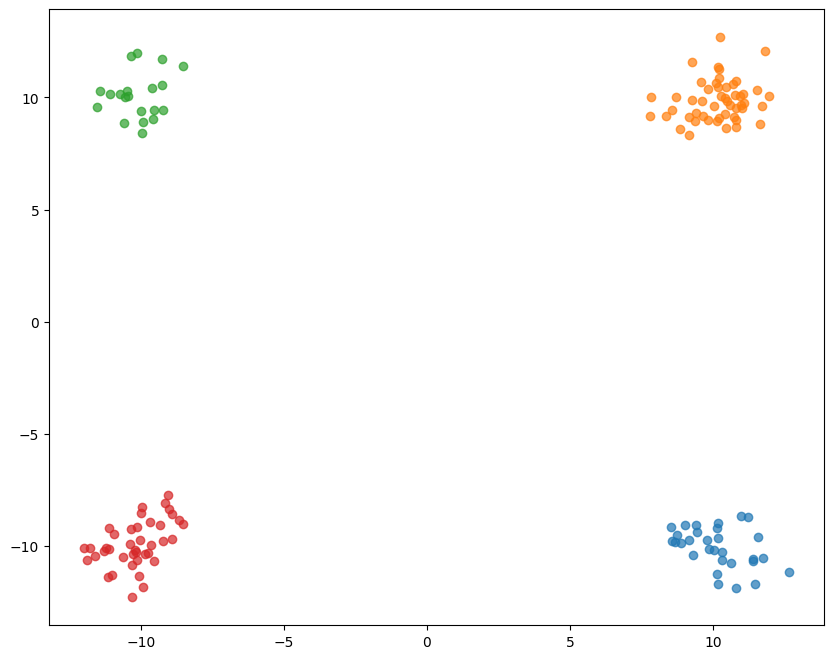

: 

In [ ]:
plt.figure(figsize=(10, 8))

for id_classe in range(nb_classes):
    cluster = data[classes == id_classe]
    plt.scatter(cluster[:, 0], cluster[:, 1], alpha=0.7)
